### Data Analysis and Arrangement

In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import layers, models
import keras.backend as K
import keras
from keras.models import Sequential
from keras.layers import Conv1D, Convolution1D, MaxPooling1D, ZeroPadding1D, BatchNormalization, Activation
from keras.utils import to_categorical 
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import timeit
from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')
import sys
from keras.regularizers import l2
import kerastuner as kt

In [3]:
csvFile = pd.read_csv("C:/Users/Dell/Downloads/SY_NG/Data/Myfile_dataA_5000.csv")

In [4]:
csvFile.shape

(5328, 9)

In [5]:
csvFile = csvFile.dropna()

In [6]:
csvFile.isna().sum()

Gate_Length          0
Work_function        0
Channel_Thickness    0
Oxide_Thickness      0
SD_doping            0
SUBSTRATE_doping     0
Gate_Voltage         0
Drain_Voltage        0
Drain Current        0
dtype: int64

In [7]:
csvFile.head()

Gate_Length  Work_function  Channel_Thickness  Oxide_Thickness  \
0  1.217760e-08       4.606941       1.090580e-08     1.352640e-09   
1  1.899270e-08       4.492014       1.087040e-08     1.360770e-09   
2  1.084500e-08       4.331288       1.020380e-08     1.093760e-09   
3  1.341160e-08       4.081299       1.006170e-08     1.204350e-09   
4  1.439060e-08       4.254729       1.082500e-08     1.780270e-09   

      SD_doping  SUBSTRATE_doping  Gate_Voltage  Drain_Voltage  Drain Current  
0  3.699440e+20      1.126280e+17      0.078664       0.216504   2.070000e-12  
1  4.060340e+20      2.214310e+17      0.496761       0.591274   2.120000e-12  
2  6.654640e+20      2.655100e+17      0.185672       0.798587   2.160000e-12  
3  4.815560e+20      2.492070e+17      0.166393       0.878277   2.210000e-12  
4  6.530570e+20      2.630330e+17      0.764250       0.111511   2.260000e-12

In [8]:
from sklearn.preprocessing import MinMaxScaler

num_features = ["Gate_Length", "Work_function",	"Channel_Thickness", "Oxide_Thickness",	"SD_doping", "SUBSTRATE_doping", "Gate_Voltage",
                "Drain_Voltage", "Drain Current"]

X = csvFile[num_features]

# Normalize data using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_normalized = scaler.fit_transform(X)

# Create a DataFrame for normalized data
csvFile_normalized = pd.DataFrame(X_normalized, columns=num_features)

In [9]:
csvFile_normalized.head()

Gate_Length  Work_function  Channel_Thickness  Oxide_Thickness  SD_doping  \
0     0.181381       0.404569           0.905891         0.352655   0.363524   
1     0.749377       0.327927           0.870487         0.360787   0.399984   
2     0.070317       0.220743           0.203820         0.093712   0.662072   
3     0.284227       0.054031           0.061706         0.204329   0.476280   
4     0.365821       0.169687           0.825083         0.780387   0.649537   

   SUBSTRATE_doping  Gate_Voltage  Drain_Voltage  Drain Current  
0          0.063083      0.078615       0.216492   0.000000e+00  
1          0.607169      0.496818       0.591275   1.655630e-08  
2          0.827593      0.185651       0.798594   2.980134e-08  
3          0.746067      0.166367       0.878286   4.635765e-08  
4          0.815206      0.764376       0.111496   6.291395e-08

In [10]:
csvFile_normalized.isnull().sum()

Gate_Length          0
Work_function        0
Channel_Thickness    0
Oxide_Thickness      0
SD_doping            0
SUBSTRATE_doping     0
Gate_Voltage         0
Drain_Voltage        0
Drain Current        0
dtype: int64

In [11]:
csvFiley = pd.DataFrame(csvFile_normalized['Drain Current'],)
print(csvFiley.shape)
csvFiley.head()

(5000, 1)


Drain Current
0   0.000000e+00
1   1.655630e-08
2   2.980134e-08
3   4.635765e-08
4   6.291395e-08

In [12]:
csvFilex = csvFile_normalized.drop('Drain Current', axis = 1)
print(csvFilex.shape)
csvFilex.head()

(5000, 8)


Gate_Length  Work_function  Channel_Thickness  Oxide_Thickness  SD_doping  \
0     0.181381       0.404569           0.905891         0.352655   0.363524   
1     0.749377       0.327927           0.870487         0.360787   0.399984   
2     0.070317       0.220743           0.203820         0.093712   0.662072   
3     0.284227       0.054031           0.061706         0.204329   0.476280   
4     0.365821       0.169687           0.825083         0.780387   0.649537   

   SUBSTRATE_doping  Gate_Voltage  Drain_Voltage  
0          0.063083      0.078615       0.216492  
1          0.607169      0.496818       0.591275  
2          0.827593      0.185651       0.798594  
3          0.746067      0.166367       0.878286  
4          0.815206      0.764376       0.111496

In [13]:
x_train, x_test, y_train, y_test = train_test_split(csvFilex, csvFiley, test_size = 0.15)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.30)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(2975, 8) (2975, 1)
(1275, 8) (1275, 1)
(750, 8) (750, 1)


### Model: Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [16]:
poly_reg_model = LinearRegression(fit_intercept=True, copy_X=True, positive=False, n_jobs=-1)
poly_reg_model.fit(x_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(x_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_reg_y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_reg_y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_reg_y_predicted)))

Mean Absolute Error: 0.14441525869070573
Mean Squared Error: 0.04612795160529548
Root Mean Squared Error: 0.21477418747441573


In [17]:
import time

num_inferences = 100
X_test_tensor = tf.convert_to_tensor(x_test)

start_time = time.time()

for _ in range(num_inferences):
    predictions = poly_reg_model.predict(X_test_tensor)

end_time = time.time()

average_inference_time = (end_time - start_time) / num_inferences
print(f"Average inference time for ML model: {average_inference_time:.6f} seconds")

Average inference time for ML model: 0.000209 seconds


### SHAP

In [19]:
import shap

In [20]:
explainer = shap.Explainer(poly_reg_model.predict, x_train)

In [21]:
shap_values = explainer(x_test)

ExactExplainer explainer: 751it [00:10,  5.28it/s]                          


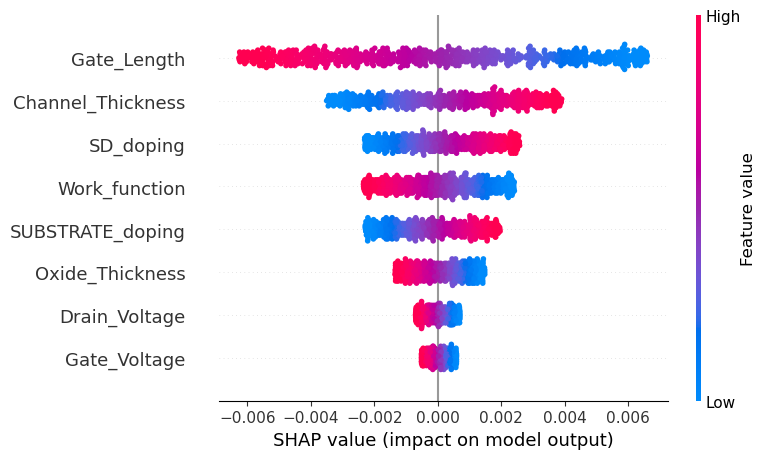

In [22]:
# Summary plot of feature importance
shap.summary_plot(shap_values, x_test, show=False)
plt.savefig("LR_shap_summary_plot.png", dpi=300, bbox_inches='tight')

In [23]:
shap_values.shape

(750, 8)

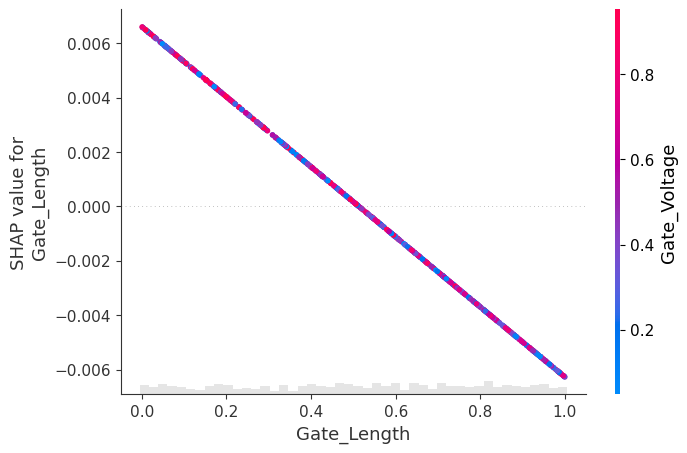

In [24]:
shap.plots.scatter(shap_values[:, 0], color=shap_values, show=False)
plt.savefig("LR_shap_scatter_plot_1.png", dpi=300, bbox_inches='tight')

In [25]:
shap.plots.waterfall(shap_values[749], show=False)
plt.savefig("LR_shap_waterfall_plot.png", dpi=300, bbox_inches='tight')

In [26]:
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("LR_shap_beeswarm_plot.png", dpi=300, bbox_inches='tight')

### LIME

In [47]:
import lime
from lime import lime_tabular

In [49]:
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(x_train), feature_names=x_train.columns, 
                                                   mode='regression')

In [51]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names=x_train.columns.values.tolist(),
                                                  class_names=['MEDV'], verbose=True, mode='regression')

In [53]:
j = 5
exp = explainer.explain_instance(x_test.values[j], poly_reg_model.predict, num_features=6)

Intercept 0.0994048431171913
Prediction_local [0.09972035]
Right: 0.10102354063551207


In [55]:
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()
fig.savefig("LR_lime_explanation_plot_1.png", dpi=300, bbox_inches='tight')

In [57]:
exp.as_list()

[('Work_function <= 0.26', 0.0023018411710734447),
 ('0.48 < Gate_Length <= 0.74', -0.002210373611364245),
 ('0.49 < Channel_Thickness <= 0.74', 0.0012098840152784851),
 ('Oxide_Thickness > 0.76', -0.0011453825930133426),
 ('0.50 < SD_doping <= 0.75', 0.0010296660714624287),
 ('0.25 < SUBSTRATE_doping <= 0.50', -0.0008701256766006884)]

In [59]:
j = 5
exp = explainer.explain_instance(x_test.values[j], poly_reg_model.predict, num_features=6)

Intercept 0.10004440971118914
Prediction_local [0.09821193]
Right: 0.10102354063551207


In [61]:
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()
fig.savefig("LR_lime_explanation_plot_2.png", dpi=300, bbox_inches='tight')

In [63]:
exp.as_list()

[('Work_function <= 0.26', 0.0022901223528388635),
 ('0.48 < Gate_Length <= 0.74', -0.002060579928952335),
 ('Oxide_Thickness > 0.76', -0.0014529230245308644),
 ('0.49 < Channel_Thickness <= 0.74', 0.001124869517395341),
 ('0.25 < SUBSTRATE_doping <= 0.50', -0.0009830604922601764),
 ('Drain_Voltage > 0.76', -0.0007509037219240413)]